## Task 6.4

In [79]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [80]:
# Import path
path = r'/Users/hannahstrassmann/Desktop/Achievement Six Project/two Data'

In [81]:
# Import df
df_HT = pd.read_csv(os.path.join(path, 'Prepared Data', 'df_HT.csv'), index_col = False)

In [82]:
df_HT.head()

,Unnamed: 0,year,agency_id,agency_name,agency_unit,agency_type,state_abbr,state_name,division_name,county_name,...,offense_id,offense_name,offense_subcat_name,total_count,unfounded_count,cleared_count,juvenile_cleared_count,Unnamed: 20,total_cleared,total_minus_cleared
0,0,2013,MO0950000,St. Louis County Police Department,NaN,County,MO,Missouri,West North Central,ST LOUIS,...,HTCSA,Human Trafficking,Commercial Sex Acts,6,0.0,6,0,NaN,6,0
1,1,2013,OH0020000,Allen,NaN,County,OH,Ohio,East North Central,ALLEN,...,HTCSA,Human Trafficking,Commercial Sex Acts,1,0.0,1,0,NaN,1,0
2,2,2013,OH0020000,Allen,NaN,County,OH,Ohio,East North Central,ALLEN,...,HTIS,Human Trafficking,Involuntary Servitude,1,0.0,0,0,NaN,0,1
3,3,2013,TN0320100,Morristown,NaN,City,TN,Tennessee,East South Central,"HAMBLEN, JEFFERSON",...,HTCSA,Human Trafficking,Commercial Sex Acts,1,0.0,1,0,NaN,1,0
4,4,2013,TNMPD0000,Memphis,NaN,City,TN,Tennessee,East South Central,SHELBY,...,HTCSA,Human Trafficking,Commercial Sex Acts,3,0.0,2,0,NaN,2,1


In [83]:
df_HT.isnull().sum()

Unnamed: 0                   0
year                         0
agency_id                    0
agency_name                  0
agency_unit               4869
agency_type                  0
state_abbr                   0
state_name                   0
division_name                0
county_name                  0
region_name                  0
pop_group_code              12
pop_group_name              12
offense_id                   0
offense_name                 0
offense_subcat_name          0
total_count                  0
unfounded_count           4031
cleared_count                0
juvenile_cleared_count       0
Unnamed: 20               5231
total_cleared                0
total_minus_cleared          0
dtype: int64

In [84]:
# Replacing missing vlaues with median
df_HT['unfounded_count'] = df_HT['unfounded_count'].fillna(df_HT['unfounded_count'].median())

In [85]:
df_HT.isnull().sum()

Unnamed: 0                   0
year                         0
agency_id                    0
agency_name                  0
agency_unit               4869
agency_type                  0
state_abbr                   0
state_name                   0
division_name                0
county_name                  0
region_name                  0
pop_group_code              12
pop_group_name              12
offense_id                   0
offense_name                 0
offense_subcat_name          0
total_count                  0
unfounded_count              0
cleared_count                0
juvenile_cleared_count       0
Unnamed: 20               5231
total_cleared                0
total_minus_cleared          0
dtype: int64

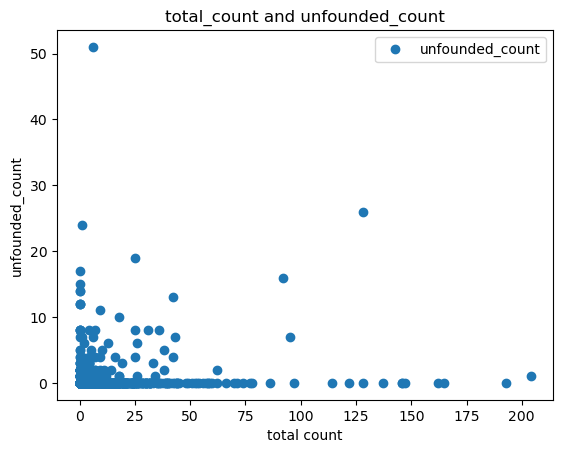

In [86]:
# Create a scatterplot for total_count and unfounded_count

df_HT.plot(x = 'total_count', y='unfounded_count',style='o') 
plt.title('total_count and unfounded_count')  
plt.xlabel('total count')  
plt.ylabel('unfounded_count')  
plt.show()

Hypothesis:
The higher the total count of human trafficking incidents, the higher the unfounded count.

In [87]:
# Reshape the variables into NumPy arrays 
X = df_HT['total_count'].values.reshape(-1,1)
y = df_HT['unfounded_count'].values.reshape(-1,1)

In [88]:
X

array([[6],
       [1],
       [1],
       ...,
       [2],
       [1],
       [1]])

In [89]:
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [90]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [91]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [92]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [108]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

AttributeError: module 'matplotlib.pyplot' has no attribute 'tit'

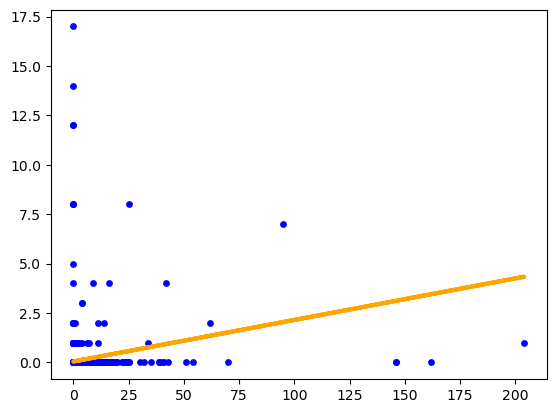

In [135]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='orange', linewidth =3)
plot_test.tit#le('total count and unfounded count')
plot_test.xlabel('unfounded_count')
plot_test.ylabel('total count')
plot_test.show()

In [112]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [114]:
# Print the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02103052]]
Mean squared error:  0.7997352103462748
R2 score:  -0.02173990474515053


In [116]:
y_predicted

array([[0.13340434],
       [0.07031278],
       [0.07031278],
       ...,
       [0.07031278],
       [0.07031278],
       [0.11237382]])

In [118]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.0,0.133404
1,0.0,0.070313
2,0.0,0.070313
3,0.0,0.070313
4,0.0,0.091343
5,0.0,0.091343
6,0.0,0.070313
7,1.0,0.049282
8,0.0,0.070313
9,0.0,0.070313


In [120]:
# Predict.
y_predicted_train = regression.predict(X_train)

In [122]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [124]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02103052]]
Mean squared error:  1.709481335153674
R2 score:  0.022687942356816926


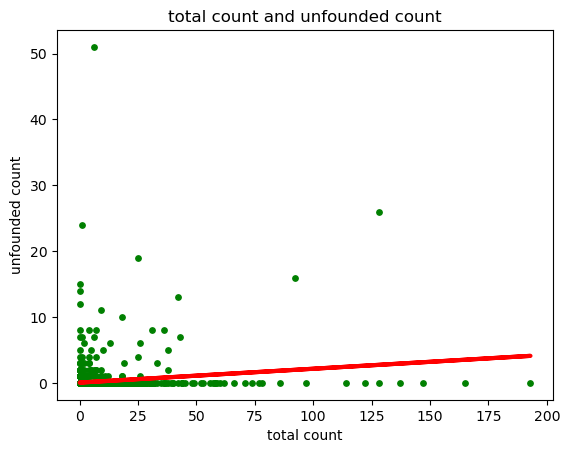

In [128]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('total count and unfounded count')
plot_test.xlabel('total count')
plot_test.ylabel('unfounded count')
plot_test.show()

Clearly there is no correlation between total_count and unfounded_count. I would have assumed, that as the total count increases, 
so does the unfounded count. I assumed this because I thought it is probably more a matter of more cases ebing reported rather than more cases happening, so it would be logical if also more unfounded cases were reported as conscious for the problem increases. ANyways, this does not appear to be the case. The correlation of 0.022 is obviously nothing. Moreover, in the test set the R2 is negative, whereas the regression line is not, which is a bit confusing. Anyways, the line does not fit the data and there is no correlationa nd therefore this is not a usuable predictive model. Most of the actual y values are zero, whereas the predicted ones are no. One problem is of course that there were so amny missing values which I imputed with the median (0), but also technically incidents are discrete, not continuous and on can't have 0,7 incidents....
